<a href="https://colab.research.google.com/github/106070020/colab/blob/master/week8_clustering_UnSupervised_leanring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#week10 - clustering
** Prepage datasets**
Download dataset movie_data.csv and then upload to your google drive (.....Colab Notebook/data/movie_data.csv)


In [ ]:
#Mount google drive to google colab virtual machine
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

doc_data = pd.read_csv(mydrive+'data/movie_data.csv')
print (doc_data.head())

movie_titles = doc_data['Title'].tolist()  # convert column Title of panda frame to list
movie_synopses = doc_data['Synopsis'].tolist()

                      Title                                           Synopsis
0             The Godfather  In late summer 1945, guests are gathered for t...
1  The Shawshank Redemption  In 1947, Andy Dufresne (Tim Robbins), a banker...
2          Schindler's List  The relocation of Polish Jews from surrounding...
3               Raging Bull  The film opens in 1964, where an older and fat...
4                Casablanca  In the early years of World War II, December 1...


In [ ]:
# Lemmatization using spacy package
import spacy
def spacy_Lemmatizer (text):
  # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
  nlp = spacy.load('en', disable=['parser', 'ner'])
  # Parse the sentence using the loaded 'en' model object `nlp`
  doc = nlp(text)
  # Extract the lemma for each token and join
  text_lem= " ".join([token.lemma_ for token in doc])
  return text_lem

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
def normalize(text):
  tokens = nltk.word_tokenize(text)
  from nltk.corpus import stopwords
  stopwords_en = stopwords.words('english')
  # add more user stopwords
  stopwords_user  = ['mr', 'mrs', 'come', 'go', 'get',
                     'tell', 'listen', 'one', 'two', 'three',
                      'four', 'five', 'six', 'seven', 'eight',
                      'nine', 'zero', 'join', 'find', 'make',
                      'say', 'ask', 'tell', 'see', 'try', 'back',
                      'also','york','michael','never','soon','john']
  
  stopwords = set(stopwords_en + stopwords_user)
  
  
  filtered_tokens = [w.lower() for w in tokens if w.lower() not in stopwords and w.isalnum()] # remove stopwords and punctuation from tokens
  text = " ".join(filtered_tokens)
  return (text)

def get_cluster_data(clustering_obj, doc_data, 
                     feature_names, num_clusters,
                     topn_features=10):

    cluster_details = {}  
    # get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    # get key features for each cluster
    # get docs belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] 
                        for index 
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        docs = doc_data[doc_data['Cluster'] == cluster_num]['Title'].values.tolist()
        cluster_details[cluster_num]['docs'] = docs
    
    return cluster_details

def print_clusters(cluster_data):
    # print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print ('Cluster {} details:'.format(cluster_num))
        print ('-'*20)
        print ('Key features:', cluster_details['key_features'])
        print ('docs in this cluster:')
        print (', '.join(cluster_details['docs']))
        print ('='*40)
        
def plot_hierarchical_clusters(linkage_matrix, doc_data, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    doc_titles = doc_data['Title'].values.tolist()
    # plot dendrogram
    ax = dendrogram(linkage_matrix, orientation="left", labels=doc_titles)
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom=False,
                    top=False,
                    labelbottom= False)
    plt.tight_layout()
    plt.savefig(mydrive+'data/hierachical_full.png', dpi=600)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#this take around 45 seconds
# lemmatizer and normalize for every movies synopses
norm_movie_synopses=[]
for i in range(len(movie_synopses)):
  synopses_lem = spacy_Lemmatizer(movie_synopses[i])
  norm_movie_synopses+= [normalize(synopses_lem)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.2, max_df=0.6)
feature_matrix = vectorizer.fit_transform(norm_movie_synopses).astype(float)
feature_names = vectorizer.get_feature_names() # get feature names
print("number of feature:", len(feature_names))

number of feature: 357


In [ ]:
#display feature matrix
pd.DataFrame(feature_matrix.toarray(), columns=feature_names)

,abandon,able,accept,accompany,across,act,action,admit,agree,air,...,without,witness,woman,word,world,would,wound,write,year,young
0,0.000000,0.000000,0.025214,0.027386,0.000000,0.023399,0.000000,0.026916,0.039462,0.000000,...,0.000000,0.000000,0.017757,0.000000,0.023739,0.050389,0.000000,0.000000,0.106544,0.114199
1,0.000000,0.073578,0.000000,0.000000,0.000000,0.033606,0.040038,0.000000,0.056675,0.000000,...,0.000000,0.038657,0.051006,0.078665,0.034094,0.241229,0.000000,0.112163,0.076509,0.027335
2,0.000000,0.056496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.313314,0.000000,0.104714,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.056738,0.049908,0.000000,0.000000,0.055764,0.000000,0.111528,...,0.000000,0.000000,0.000000,0.056738,0.000000,0.000000,0.000000,0.000000,0.110366,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.121610,0.000000,0.000000,0.077258,0.133938,0.047383,0.000000,0.073438,0.050094,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.060872,0.086138,0.000000,0.000000,0.000000,0.048805
6,0.000000,0.021883,0.043080,0.023396,0.061739,0.000000,0.000000,0.045989,0.050568,0.022995,...,0.018414,0.068984,0.075850,0.000000,0.000000,0.100443,0.046792,0.000000,0.075850,0.048780
7,0.000000,0.000000,0.000000,0.000000,0.107803,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.183834,0.000000,0.112747,0.000000,0.174744,0.039733,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074226,...,0.059438,0.000000,0.000000,0.000000,0.065464,0.046318,0.000000,0.000000,0.000000,0.000000
9,0.096006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091019,...,0.000000,0.091019,0.120095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128723


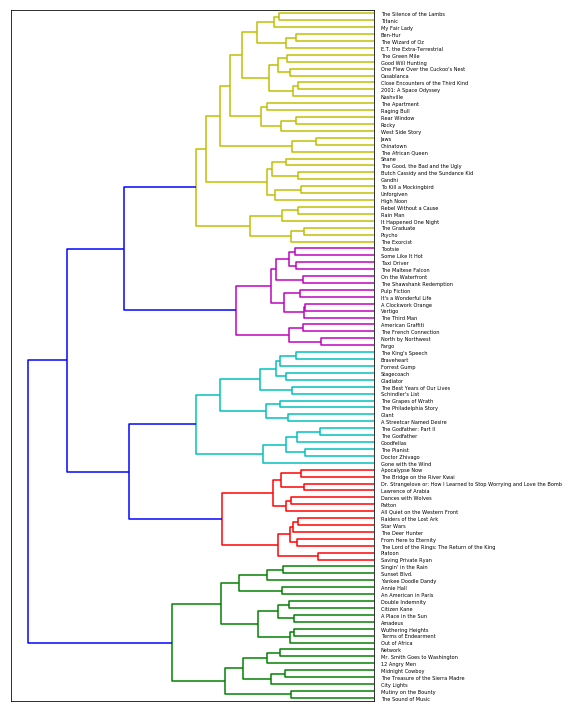

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties
from scipy.cluster.hierarchy import ward, dendrogram

def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

# build ward's linkage matrix    
linkage_matrix = ward_hierarchical_clustering(feature_matrix)
plot_hierarchical_clusters(linkage_matrix=linkage_matrix, doc_data=doc_data, figure_size=(8,10))

In [ ]:
#it take around 25 seconds
from sklearn.cluster import KMeans

def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters, n_init=500, random_state = 1,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

num_clusters = 5
km_obj, km_clusters = k_means(feature_matrix=feature_matrix,
                           num_clusters=num_clusters)

doc_data['Cluster'] = km_clusters

km_cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                 doc_data = doc_data,
                                 feature_names=feature_names,
                                 num_clusters=num_clusters,
                                 topn_features=8)

print_clusters(km_cluster_data)  

Cluster 0 details:
--------------------
Key features: ['love', 'film', 'relationship', 'father', 'girl', 'house', 'scene', 'woman']
docs in this cluster:
Citizen Kane, Sunset Blvd., Singin' in the Rain, An American in Paris, The Exorcist, City Lights, It Happened One Night, Midnight Cowboy, Mr. Smith Goes to Washington, Annie Hall, Out of Africa, Terms of Endearment, The Graduate, Wuthering Heights, Double Indemnity, Yankee Doodle Dandy
Cluster 1 details:
--------------------
Key features: ['water', 'captain', 'save', 'board', 'cross', 'attempt', 'city', 'mother']
docs in this cluster:
The Wizard of Oz, Titanic, The Sound of Music, Chinatown, Ben-Hur, Jaws, The African Queen, Mutiny on the Bounty
Cluster 2 details:
--------------------
Key features: ['family', 'father', 'brother', 'son', 'war', 'marry', 'fight', 'murder']
docs in this cluster:
The Godfather, Raging Bull, Gone with the Wind, The Godfather: Part II, On the Waterfront, Forrest Gump, 12 Angry Men, Amadeus, Gladiator, A Str